In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

In [181]:
data=pd.read_csv('Growth.csv')

In [182]:
data.head()

,Population,PerCapita,Trade,Health,Unemployment,Environment,Growth
0,7945977,162.1844,-0.122353,91.5259,13.82,10848.0,1.83
1,8091461,185.3671,-0.072269,98.5637,13.03,11385.2,1.90
2,8245475,187.2283,-0.047386,106.1440,12.27,12412.3,1.96
3,8406910,197.7579,-0.040201,116.3432,11.35,12868.2,2.00
4,8575075,218.3510,-0.034844,110.8334,10.60,13984.4,2.04


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    74 non-null     int64  
 1   PerCapita     74 non-null     float64
 2   Trade         74 non-null     float64
 3   Health        74 non-null     float64
 4   Unemployment  74 non-null     float64
 5   Environment   74 non-null     float64
 6   Growth        74 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 4.2 KB


In [184]:
data.describe()

,Population,PerCapita,Trade,Health,Unemployment,Environment,Growth
count,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.577405e+07,1110.118619,-1.331458,116.226327,7.366946,13909.881081,1.385270
std,4.460055e+06,1373.914004,1.807432,39.127930,2.826959,5079.842344,0.710028
min,7.945977e+06,117.962300,-6.541885,41.305000,3.880000,5091.300000,0.250000
25%,1.191491e+07,202.906175,-1.377518,98.563700,4.780000,10928.900000,0.827500
50%,1.643257e+07,398.175250,-0.747307,134.669250,7.670000,12868.200000,1.370000
75%,1.962801e+07,1195.422950,-0.075159,146.950300,8.850000,17440.400000,1.995000
max,2.189358e+07,4388.201900,0.150169,159.464700,14.220000,23427.900000,2.440000


In [185]:
data.isnull().sum()

Population      0
PerCapita       0
Trade           0
Health          0
Unemployment    0
Environment     0
Growth          0
dtype: int64

In [186]:
data.corr()

,Population,PerCapita,Trade,Health,Unemployment,Environment,Growth
Population,1.000000,0.762442,-0.694403,-0.135073,-0.456197,0.192189,-0.935902
PerCapita,0.762442,1.000000,-0.749847,0.151943,-0.434199,0.458497,-0.791256
Trade,-0.694403,-0.749847,1.000000,0.047613,0.404720,-0.155717,0.654954
Health,-0.135073,0.151943,0.047613,1.000000,0.069480,0.273130,0.084332
Unemployment,-0.456197,-0.434199,0.404720,0.069480,1.000000,-0.309198,0.276133
Environment,0.192189,0.458497,-0.155717,0.273130,-0.309198,1.000000,-0.161673
Growth,-0.935902,-0.791256,0.654954,0.084332,0.276133,-0.161673,1.000000


<Axes: >

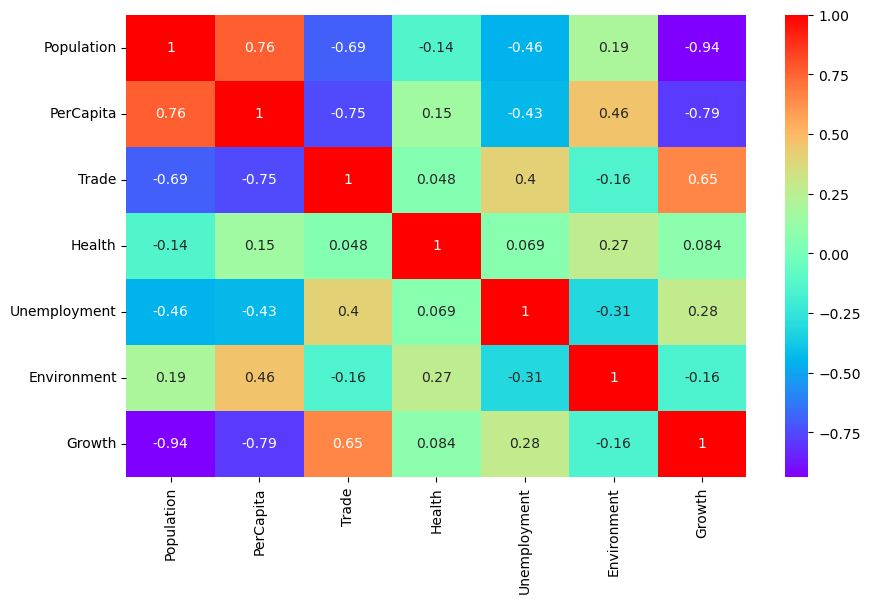

In [187]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

Text(0, 0.5, 'Total Population')

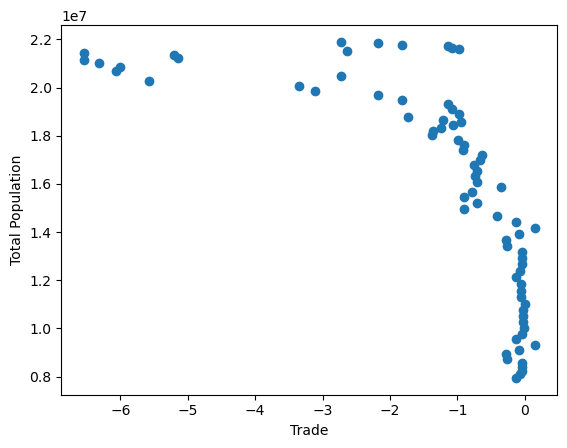

In [188]:
plt.scatter(data['Trade'],data['Population'])
plt.xlabel('Trade')
plt.ylabel('Total Population')

Text(0, 0.5, 'Growth Change')

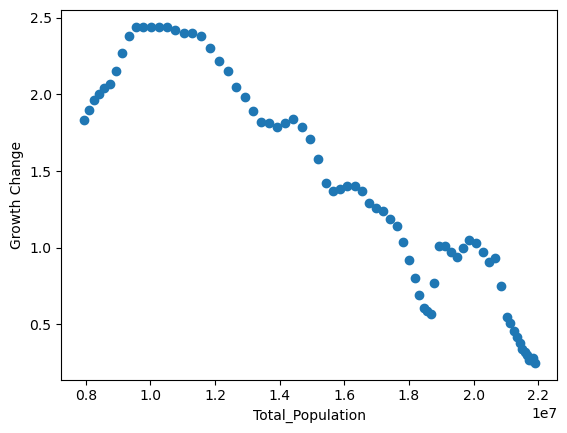

In [189]:
plt.scatter(data['Population'],data['Growth'])
plt.xlabel('Total_Population')
plt.ylabel('Growth Change')

Text(0, 0.5, 'Growth Change')

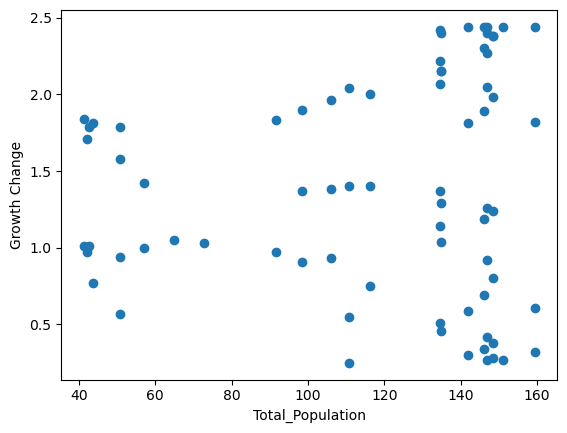

In [190]:
plt.scatter(data['Health'],data['Growth'])
plt.xlabel('Total_Population')
plt.ylabel('Growth Change')

In [191]:
data.drop(columns="Health",inplace=True)

In [192]:
data.head()

,Population,PerCapita,Trade,Unemployment,Environment,Growth
0,7945977,162.1844,-0.122353,13.82,10848.0,1.83
1,8091461,185.3671,-0.072269,13.03,11385.2,1.90
2,8245475,187.2283,-0.047386,12.27,12412.3,1.96
3,8406910,197.7579,-0.040201,11.35,12868.2,2.00
4,8575075,218.3510,-0.034844,10.60,13984.4,2.04


Text(0, 0.5, 'Growth change %')

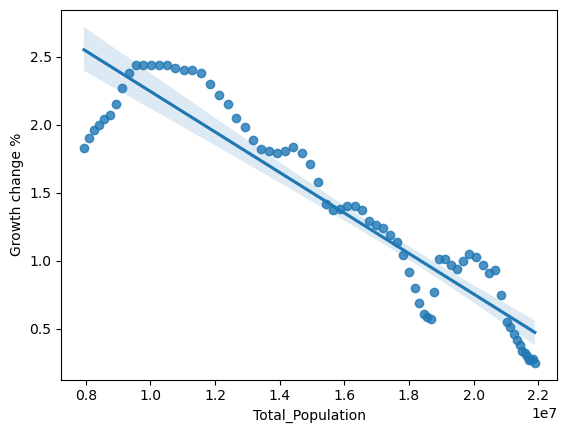

In [193]:
sns.regplot(x='Population',y='Growth',data=data)
plt.xlabel('Total_Population')
plt.ylabel('Growth change %')

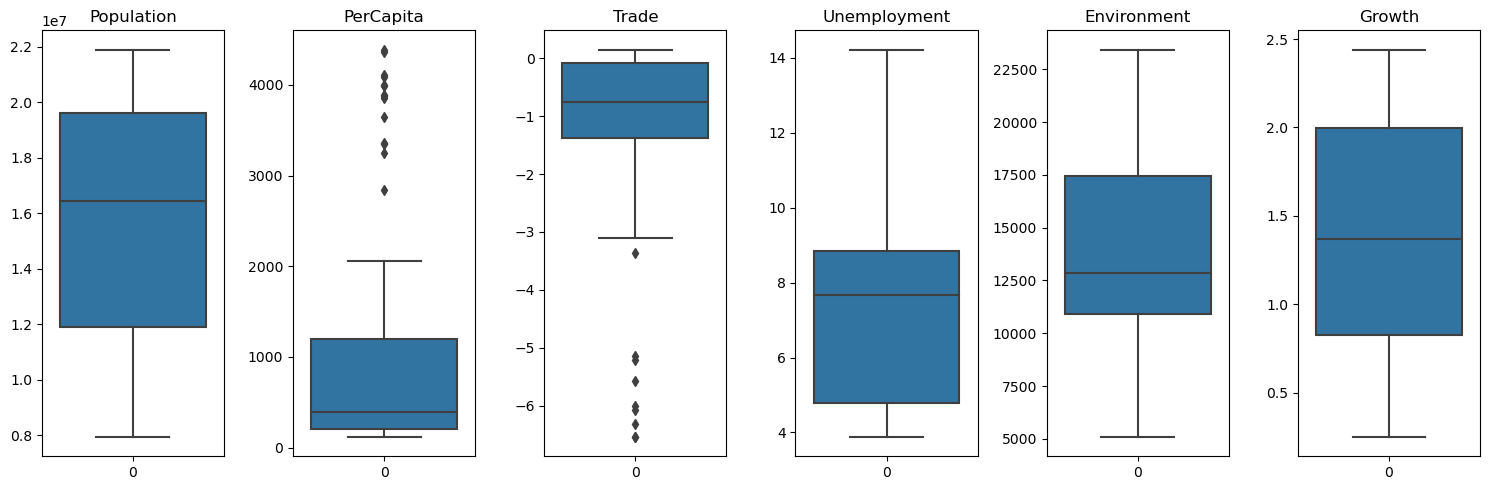

In [194]:
fig, axes = plt.subplots(1, len(data.columns), figsize=(15, 5))

# Iterate through each column and create a boxplot
for i, column in enumerate(data.columns):
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(column)
# Adjust layout
plt.tight_layout()

plt.show()

In [195]:
# Dependent and independent data
x=data.drop('Growth',axis=1)
y=data['Growth']

In [196]:
x.head()

,Population,PerCapita,Trade,Unemployment,Environment
0,7945977,162.1844,-0.122353,13.82,10848.0
1,8091461,185.3671,-0.072269,13.03,11385.2
2,8245475,187.2283,-0.047386,12.27,12412.3
3,8406910,197.7579,-0.040201,11.35,12868.2
4,8575075,218.3510,-0.034844,10.60,13984.4


In [197]:
y.head()

0    1.83
1    1.90
2    1.96
3    2.00
4    2.04
Name: Growth, dtype: float64

In [198]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [199]:
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)

x_test shape: (15, 5)
y_test shape: (15,)
x_train shape: (59, 5)
y_train shape: (59,)


# Create an Evaluate Function to give all metrics after model Training

In [200]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [201]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1881
- Mean Absolute Error: 0.1641
- R2 Score: 0.9306
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1723
- Mean Absolute Error: 0.1512
- R2 Score: 0.9260


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.2357
- Mean Absolute Error: 0.1965
- R2 Score: 0.8910
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1772
- Mean Absolute Error: 0.1442
- R2 Score: 0.9217


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1881
- Mean Absolute Error: 0.1641
- R2 Score: 0.9306
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1722
- Mean Absolute Error: 0.1512
- R2 Score: 0.9261


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0596
- Mean Absolute Error: 0.0409
- R2 Score: 0.9930
-----------------------

In [202]:
#Scaling the sata
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [203]:
x_test_S=scale.fit_transform(x_test)
x_test_S

array([[ 1.16017934,  1.78794012,  0.17724779, -0.78768532,  2.08555886],
       [-2.12878694, -0.73457118,  0.81933506,  0.75682113, -0.40847959],
       [ 0.01587079, -0.593532  ,  0.54951195, -0.99387888,  0.05387799],
       [ 0.69231438,  0.07915743, -1.27674629, -0.28192754, -0.05110558],
       [-1.00753079, -0.76836832,  0.99031585,  0.59731291, -1.32473271],
       [-0.49278531, -0.71759041,  0.49295012, -0.95108399, -0.3036544 ],
       [-1.86642866, -0.8205977 ,  0.98524701,  0.20048757,  0.27149263],
       [ 0.36002799, -0.32335124,  0.31691229,  0.75682113, -1.32808132],
       [ 0.64238168, -0.04934057, -0.58975977,  0.17325446, -0.3036544 ],
       [-0.69168968, -0.78858623,  0.91984581, -0.4881211 , -0.76074018],
       [ 0.59584944, -0.17622707, -0.32687   ,  0.44947602, -0.40680528],
       [ 0.45121708, -0.33640586,  0.292356  ,  0.26273468, -0.74243593],
       [ 0.12250492, -0.53469343,  0.3538006 ,  2.72149558,  1.13821794],
       [ 1.03952757,  1.81131778, -2.7

In [204]:
x_train_S=scale.transform(x_train)
x_train_S

array([[-1.48190064e+00, -8.12930760e-01,  9.71100882e-01,
        -2.81927542e-01,  2.02053240e+00],
       [-7.56569725e-01, -7.18048207e-01,  1.12662456e+00,
        -2.81927542e-01, -7.42435930e-01],
       [ 8.94706482e-01,  1.07366153e+00, -3.45726138e+00,
        -9.51083989e-01, -4.34159836e-01],
       [-2.25667595e+00, -7.90261106e-01,  9.81075185e-01,
         1.96285891e+00, -4.06805282e-01],
       [-3.21897187e-01, -6.54131686e-01,  7.51520682e-01,
        -1.16116799e+00, -1.39979595e-01],
       [ 1.18987514e+00,  1.43762509e+00, -5.89759772e-01,
        -2.02173430e-01,  1.13821794e+00],
       [ 1.17498412e+00,  1.88772723e+00, -3.26869997e-01,
        -7.72512588e-01,  1.72770971e+00],
       [-1.68031999e+00, -8.38985201e-01,  1.00012100e+00,
         3.87228905e-01,  7.34890990e-01],
       [-6.24321869e-01, -7.60743165e-01,  7.17453205e-01,
        -7.79904433e-01, -6.39194549e-01],
       [-2.33265008e+00, -8.07877849e-01,  9.25843221e-01,
         2.56587780e+00

# Model Training and Prediction

In [205]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [206]:
reg.fit(x_train_S,y_train)

LinearRegression()

In [207]:
print(reg.coef_)

[-0.55825578 -0.21288239 -0.04126954 -0.14303028  0.03588359]


In [208]:
print(reg.intercept_)

1.168994546439283


In [209]:
#on which parameters the model has been trained
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [210]:
#Prediction with test data
reg_pred=reg.predict(x_test)
reg_pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-12122547.40840827,  -4884141.59103157,  -9603865.39068356,
       -11092737.3507362 ,  -7351828.60148748,  -8484483.46240313,
        -5461380.21544729, -10361554.81545247, -10982851.65359198,
        -8046805.18614248, -10880426.07943735, -10562137.91504332,
        -9838382.6561495 , -11857357.65773573, -12006404.88817806])

In [211]:
y_pred=reg.predict(x_test)
y_pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-12122547.40840827,  -4884141.59103157,  -9603865.39068356,
       -11092737.3507362 ,  -7351828.60148748,  -8484483.46240313,
        -5461380.21544729, -10361554.81545247, -10982851.65359198,
        -8046805.18614248, -10880426.07943735, -10562137.91504332,
        -9838382.6561495 , -11857357.65773573, -12006404.88817806])

In [212]:
reg.score(x_train_S,y_train)

0.9305633948571652

# Assumption

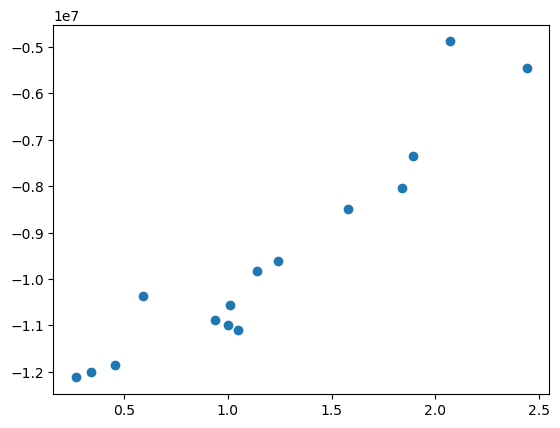

In [214]:
#Scatter plot for prediction
plt.scatter(y_test,reg_pred)

#if the plot is linear prediction is almost good

In [215]:
#Residual or error
residual=y_test-reg_pred
residual.count()

15

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


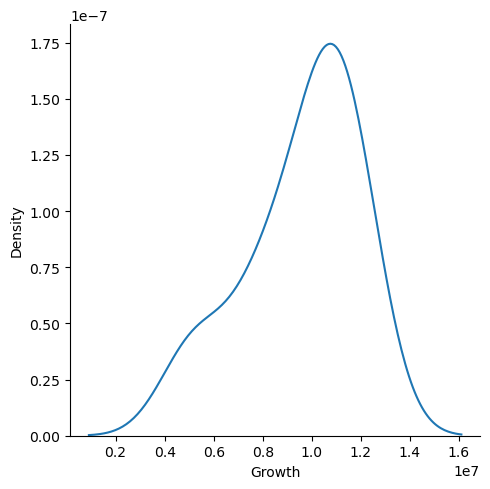

In [216]:
#plot this residual
sns.displot(residual,kind='kde')

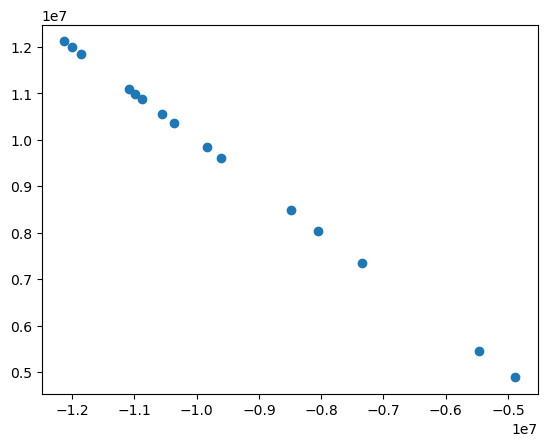

In [217]:
#Scatter plot respect to prediction and residual
#Uniform Matrix
plt.scatter(reg_pred,residual)

# Pickling the model file for deployment

In [218]:
import pickle

In [219]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [220]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [221]:
pickle.dump(scale,open('scaling.pkl','wb'))